### Model Testing

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Loading the model

model = pickle.load(open('Regression_model.sav', 'rb'))

In [3]:
# Reading the Data
data = pd.read_csv('current_bitcoin_data.csv')
data

,Unnamed: 0,Date,High,Low,Mid,Last,Bid,Ask,Volume
0,0,2021-07-01,35218.0,32720.000000,33582.5,33588.846394,33578.0,33587.0,5803.385196
1,1,2021-06-30,36197.0,34428.000000,34885.5,34888.368009,34881.0,34890.0,3345.769838
2,2,2021-06-29,36600.0,34151.000000,36154.0,36142.000000,36153.0,36155.0,5442.171284
3,3,2021-06-28,35319.0,33897.000000,34424.0,34428.482199,34419.0,34429.0,6583.076066
4,4,2021-06-27,34380.0,31799.000000,34247.5,34265.396951,34243.0,34252.0,29518.794084
...,...,...,...,...,...,...,...,...,...
87,87,2021-04-05,59250.0,56850.000000,58895.5,58895.000000,58895.0,58896.0,5428.595234
88,88,2021-04-04,58480.0,56500.000000,58124.5,58124.000000,58124.0,58125.0,5477.169560
89,89,2021-04-03,59841.0,57120.000000,57532.5,57526.000000,57531.0,57534.0,6144.147122
90,90,2021-04-02,60190.0,58327.986894,58824.5,58825.000000,58824.0,58825.0,6104.000059


In [4]:
# Sorting the data by 'Date' in ascending order

data_sorted = data.sort_values(by='Date', ascending=True)
data_sorted

,Unnamed: 0,Date,High,Low,Mid,Last,Bid,Ask,Volume
91,91,2021-04-01,59483.0,57955.000000,58897.5,58911.000000,58895.0,58900.0,4425.964369
90,90,2021-04-02,60190.0,58327.986894,58824.5,58825.000000,58824.0,58825.0,6104.000059
89,89,2021-04-03,59841.0,57120.000000,57532.5,57526.000000,57531.0,57534.0,6144.147122
88,88,2021-04-04,58480.0,56500.000000,58124.5,58124.000000,58124.0,58125.0,5477.169560
87,87,2021-04-05,59250.0,56850.000000,58895.5,58895.000000,58895.0,58896.0,5428.595234
...,...,...,...,...,...,...,...,...,...
4,4,2021-06-27,34380.0,31799.000000,34247.5,34265.396951,34243.0,34252.0,29518.794084
3,3,2021-06-28,35319.0,33897.000000,34424.0,34428.482199,34419.0,34429.0,6583.076066
2,2,2021-06-29,36600.0,34151.000000,36154.0,36142.000000,36153.0,36155.0,5442.171284
1,1,2021-06-30,36197.0,34428.000000,34885.5,34888.368009,34881.0,34890.0,3345.769838


In [5]:
# Rename the Closing price column

data_sorted = data_sorted.rename(columns={'Last':'Close'})
data_sorted.head()

,Unnamed: 0,Date,High,Low,Mid,Close,Bid,Ask,Volume
91,91,2021-04-01,59483.0,57955.000000,58897.5,58911.0,58895.0,58900.0,4425.964369
90,90,2021-04-02,60190.0,58327.986894,58824.5,58825.0,58824.0,58825.0,6104.000059
89,89,2021-04-03,59841.0,57120.000000,57532.5,57526.0,57531.0,57534.0,6144.147122
88,88,2021-04-04,58480.0,56500.000000,58124.5,58124.0,58124.0,58125.0,5477.169560
87,87,2021-04-05,59250.0,56850.000000,58895.5,58895.0,58895.0,58896.0,5428.595234


In [6]:
# Assign X (data) and y (target)

X = data_sorted[['High', 'Low', 'Volume']]
y = data_sorted['Close'].values.reshape(-1,1)

print(X.shape, y.shape)

(92, 3) (92, 1)


In [15]:
# Make predictions and compare the actual values with the predicted values

predictions = model.predict(X)
results_df = pd.DataFrame(list(zip(y, predictions)))
results_df.columns=['Actual', 'Predicted']
results_df

,Actual,Predicted
0,[58911.0],[58742.250183937096]
1,[58825.0],[59286.03823936182]
2,[57526.0],[58526.06076846204]
3,[58124.0],[57520.90099561818]
4,[58895.0],[58090.08121882928]
...,...,...
87,[34265.39695127],[33084.64171438032]
88,[34428.48219863],[34624.869607210916]
89,[36142.0],[35416.91222807607]
90,[34888.36800874],[35343.47867149159]


In [16]:
# Create a column 'EMA' to show exponential moving average for the closing values

results_df['EMA'] = results_df.iloc[:,0].ewm(span=40,adjust=False).mean()
results_df

,Actual,Predicted,EMA
0,[58911.0],[58742.250183937096],58911.000000
1,[58825.0],[59286.03823936182],58906.804878
2,[57526.0],[58526.06076846204],58839.448543
3,[58124.0],[57520.90099561818],58804.548614
4,[58895.0],[58090.08121882928],58808.960876
...,...,...,...
87,[34265.39695127],[33084.64171438032],38050.090580
88,[34428.48219863],[34624.869607210916],37873.426757
89,[36142.0],[35416.91222807607],37788.966915
90,[34888.36800874],[35343.47867149159],37647.474285


In [17]:
# Create a column 'SMA_15' to show a 15-day simple moving average for the predicted values

results_df['SMA_15'] = results_df.iloc[:,0].rolling(window=15).mean()
results_df

,Actual,Predicted,EMA,SMA_15
0,[58911.0],[58742.250183937096],58911.000000,NaN
1,[58825.0],[59286.03823936182],58906.804878,NaN
2,[57526.0],[58526.06076846204],58839.448543,NaN
3,[58124.0],[57520.90099561818],58804.548614,NaN
4,[58895.0],[58090.08121882928],58808.960876,NaN
...,...,...,...,...
87,[34265.39695127],[33084.64171438032],38050.090580,35482.525245
88,[34428.48219863],[34624.869607210916],37873.426757,35189.878048
89,[36142.0],[35416.91222807607],37788.966915,34916.839406
90,[34888.36800874],[35343.47867149159],37647.474285,34566.063940


In [18]:
# Create a column 'SMA_30' to show a 30-day simple moving average for the predicted values

results_df['SMA_30'] = results_df.iloc[:,0].rolling(window=30).mean()
results_df

,Actual,Predicted,EMA,SMA_15,SMA_30
0,[58911.0],[58742.250183937096],58911.000000,NaN,NaN
1,[58825.0],[59286.03823936182],58906.804878,NaN,NaN
2,[57526.0],[58526.06076846204],58839.448543,NaN,NaN
3,[58124.0],[57520.90099561818],58804.548614,NaN,NaN
4,[58895.0],[58090.08121882928],58808.960876,NaN,NaN
...,...,...,...,...,...
87,[34265.39695127],[33084.64171438032],38050.090580,35482.525245,35807.546579
88,[34428.48219863],[34624.869607210916],37873.426757,35189.878048,35808.129319
89,[36142.0],[35416.91222807607],37788.966915,34916.839406,35820.662652
90,[34888.36800874],[35343.47867149159],37647.474285,34566.063940,35750.408252


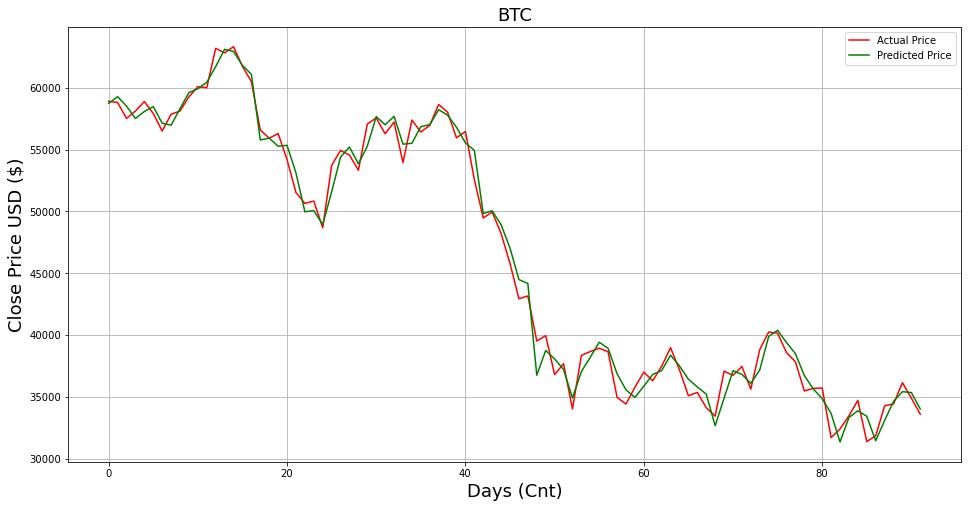

In [19]:
# Plot the Actual and Predicted values on a line chart

plt.figure(figsize=(16,8))
plt.title('BTC', fontsize = 18)
plt.xlabel('Days (Cnt)', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(results_df['Actual'], c='red', label='Actual Price')
plt.plot(results_df['Predicted'], c='green', label='Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

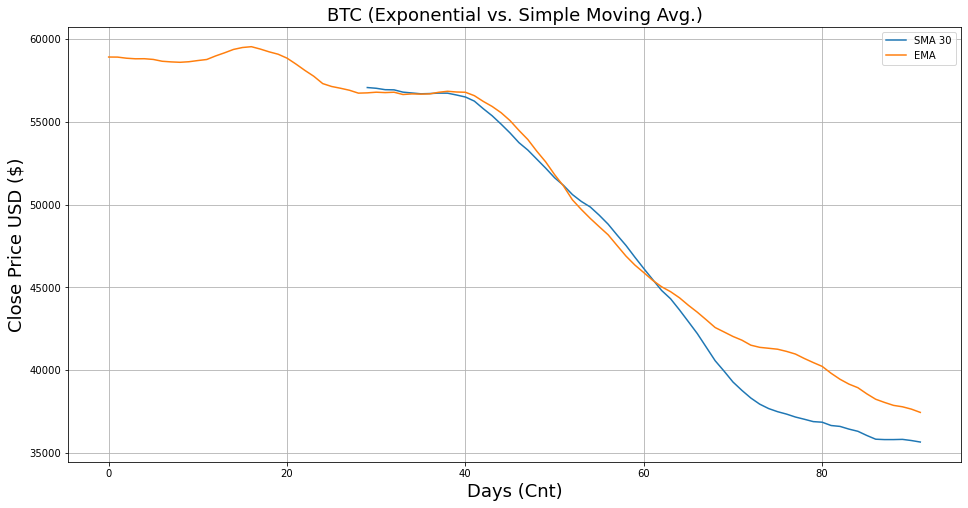

In [22]:
# Plot the 30-Day simple moving average and the exponential moving average on a line chart

plt.figure(figsize=(16,8))
plt.title('BTC (Exponential vs. Simple Moving Avg.)', fontsize = 18)
plt.xlabel('Days (Cnt)', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
# plt.plot(results_df['SMA_15'],label='SMA 15')
plt.plot(results_df['SMA_30'],label='SMA 30')
plt.plot(results_df['EMA'],label='EMA')
plt.legend()
plt.grid(True)
plt.show()